In [38]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#settings
pd.options.display.max_columns = 250
pd.options.display.max_rows = 250
sns.set(style="whitegrid")


## Column based analysis function
<strong>Parameters</strong> <br/>
- <strong>`df`</strong> : Data frame containing the data.
- <strong>`col_analysed`</strong> - The feature column whose impact you want to see on the target variable
- <strong>`target_col`</strong> - It is generally equivalent to the target variable for ex. 'UHGPrimacy' in our case.

In [39]:
def column_based_analysis(df, col_analysed, target_col):
    df_dist = df.groupby([col_analysed, target_col]).agg({target_col: 'count'})
    df_dist.rename(columns={target_col:'record_count'}, inplace=True)
    df_dist['primacy_percent'] = df_dist['record_count'].groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
    df_total=df.groupby([col_analysed]).agg({col_analysed:'count'})
    df_total.rename(columns={col_analysed:'total_records'}, inplace=True)
    df_total['dataset_percent'] = df_total['total_records'].apply(lambda x: (x/float(len(df.index)))*100)
    df_dist = df_dist.join(df_total).sort_values(by=['record_count'],ascending=False)
    return df_dist

## Function that creates graph from the output of column based analysis function
#### Parameters
- <strong>`df_graph`</strong> : Data frame containing the data.
- <strong>`n`</strong> - number of values you want to analyze. Recommended range (5 -20)
- <strong>`col_analysed`</strong> - number of the column whose values are used to create the graph.

In [40]:
def graph_for_column_analysis(df_graph, n, col_analysed):
    # convert index into columns.
    df_graph.reset_index(inplace= True)
    
    # storing top 10 values from col_analysed column, we will generate graphs for these values only.
    top_col_analysed = list(df_graph[col_analysed][:n])
    
    # fetching all records that have values for col_analysed column present in top_col_analysed list
    df_analysed_graph = df_graph[df_graph[col_analysed].isin(top_col_analysed)]
    
    #plotting graph
    plt.show()
    plt.figure(figsize = (20, 5))
    sns_plot = sns.barplot(x = df_analysed_graph[col_analysed], y = df_analysed_graph.record_count, hue = df_analysed_graph.UHGPrimacy, data = df_analysed_graph)
    sns_plot.set_xticklabels(sns_plot.get_xticklabels(), rotation = 45, fontsize = 12)
    sns_plot.set_title('Total Records in our dataset: {}'.format(df.shape[0]), fontsize = 20)
    sns_plot

## Date encoding function
#### Parameters
- <strong>`x`</strong> : Single value in a column. `x` will be a single value of datetime data type.

In [41]:
# function to encode date columns
def encode_date_column(x):
    if x == None:
        date = '00000000'
    else:
        year = x[0:4]
        month = x[5:7]
        day = x[8:10]
        date = year+month+day
    return(date)

## Loading data
#### *Important Note* -  
- For the demonstration purposes we are using the selected feature from our previous notebook. You can use any column you want to analyse. You can add the column name in the text file or append the column name to the list by writing below code
> `selected_feature.append(name_of_the_new_column_i_want_to_add)`

In [42]:
# change value of target_col according to your scenario
target_col = 'UHGPrimacy'

In [43]:
df = pd.read_pickle("C:\Git Repos\OPIMLBoot\wowpickle.pkl")

# Picking 73,000 records randomly as the data set is very big. Dont use the following line while doing proper analysis.
df = df.sample(73000)

# Selecting only those columns that were generated by MLBOOT- Final Ver. These columns are saved in selected_feature_list.txt
# Reading features from text file into the list selected_feature

selected_feature = []
selected_feature.append(target_col)

with open('C:\Git Repos\ML\selected_feature_list.txt', 'r') as f:
    for line in f:
        selected_feature.append(line.strip())

df = df[selected_feature]

df.head()

UHGPrimacy    ZIP SUBGROUPCODE RELCODE  GROUPCODE  \
13219            1  10518    0008W7795      SP  0008W7795   
209955           1  92844       362017      SP     362017   
246181           2  97211         None      EE  000701648   
224893           2  50613        IAQHP    None      IAQHP   
358832           1  11050       HP9434       D     HP9434   

                         COBBATCHID WORKINGSTATUS SUBZIP CONTRACTTHRUDATE  \
13219        CAQHUNDFIUNET_20180104             A   None       9999-12-31   
209955        CBMNICFIMTH2_20180209          None  92844       9999-12-31   
246181       CAQHUNDFIUNET_20180110             A  97211       9999-12-31   
224893  SEGCOMPCSPTPLACPTD_20180219          None  50613       2199-12-31   
358832       CAQHUNDOXFORD_20180315          None  11050       9999-12-31   

        BUSINESS_ID  WFID SUBGENDER ORIGINALEFFECTIVEDATE IMACRO_DUP_REVIEW  \
13219           6.0  3227         M            2016-12-01                 N   
209955          9.0  1251         F                  None                 Y   
246181          6.0  3190         F                  None                 N   
224893         36.0  3993         M            2017-12-01                 N   
358832          1.0  3137         F                  None                 N   

                             GROUPNAME FUNDINGTYPE FEEDBACKCD         DOB  \
13219                       ARROWSIGHT           F          P  1965-11-14   
209955  TARGUS INTERNATIONAL LLC SV AC           F       None  1943-05-05   
246181        INSPERITY HOLDINGS, INC.        None       None  1985-11-28   
224893        Iowa Quality Health Plan        None       None  2017-03-19   
358832      HILL PROPERTY PARTNERS LLC           F       None  1999-11-02   

       CONTRACTFROMDATE  
13219        2017-12-01  
209955       2018-01-01  
246181       2017-12-11  
224893       2017-12-01  
358832       2018-01-01

### Visualizing distribution of target column i.e. target_col

1    44897
2    27992
3      111
Name: UHGPrimacy, dtype: int64


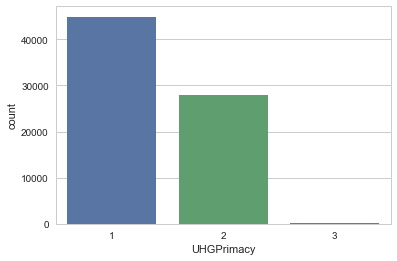

In [44]:
print(df[target_col].value_counts())
ax = sns.countplot(df[target_col],label="Count")

## Sorting columns into their respective category (categorical, numerical and date)

In [45]:
# sorting into categorical and numerical list using dtype i.e. data type of the column
categorical_list = []
numerical_list = []
for i in df.columns.tolist():
    if df[i].dtype=='object':
        categorical_list.append(i)
    else:
        numerical_list.append(i)

print('Number of categorical features:', str(len(categorical_list)))

Number of categorical features: 16


In [46]:
date_list = []
new_list2 = []
print("No. of categorical columns before removing date columns: ", len(categorical_list))
for item in categorical_list:
    if item[-4:] == 'DATE' or item[-3:] == '_DT' or item[-3:] == 'DOB':
        date_list.append(item)
    else:
        new_list2.append(item)
    
print("No. of categorical columns after removing date columns: ", len(new_list2))
categorical_list = new_list2
date_list

No. of categorical columns before removing date columns:  16
No. of categorical columns after removing date columns:  12


['CONTRACTTHRUDATE', 'ORIGINALEFFECTIVEDATE', 'DOB', 'CONTRACTFROMDATE']

### Processing data for correlation calculation

In [47]:
# making new data frame for processed data
df_processed = df.copy()

# applying encoding function to columns present in date list
for item in date_list:
    df_processed[item] = df_processed[item].apply(encode_date_column)


In [48]:
# using label encoder for encoding categorical values
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

#dictionary for storing label encoder for each feature
le_dict = defaultdict(LabelEncoder)

for item in categorical_list:
    df_processed[item] = le_dict[item].fit_transform(df_processed[item].astype(str))

df_processed[categorical_list].sample(5)

ZIP  SUBGROUPCODE  RELCODE  GROUPCODE  COBBATCHID  WORKINGSTATUS  \
20826    5208          2126       34       3324        1982              0   
265970  17936          7462       34      10251        1286              9   
399027    504          7053       34       9830        1577              0   
237932  15121         18021       11      23119         947              9   
275271   3101         12336       49      16220        1967              0   

        SUBZIP  SUBGENDER  IMACRO_DUP_REVIEW  GROUPNAME  FUNDINGTYPE  \
20826     4450          1                  2       8872            2   
265970   17472          2                  0      14965            0   
399027   17472          1                  0      11072            2   
237932   17472          2                  0      15646            5   
275271    2709          1                  0      11276            2   

        FEEDBACKCD  
20826            1  
265970           2  
399027           2  
237932           0  
275271           2

In [49]:
# filling null values with median value i.e. for column A we will fill null values with the median value of column A
from sklearn.preprocessing import Imputer

df1 = pd.DataFrame(Imputer(strategy='median').fit_transform(df_processed))
df1.columns = df_processed.columns
df1.index = df_processed.index
df_processed = df1.copy()


C:\Users\dyadav41\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


### Correlation 

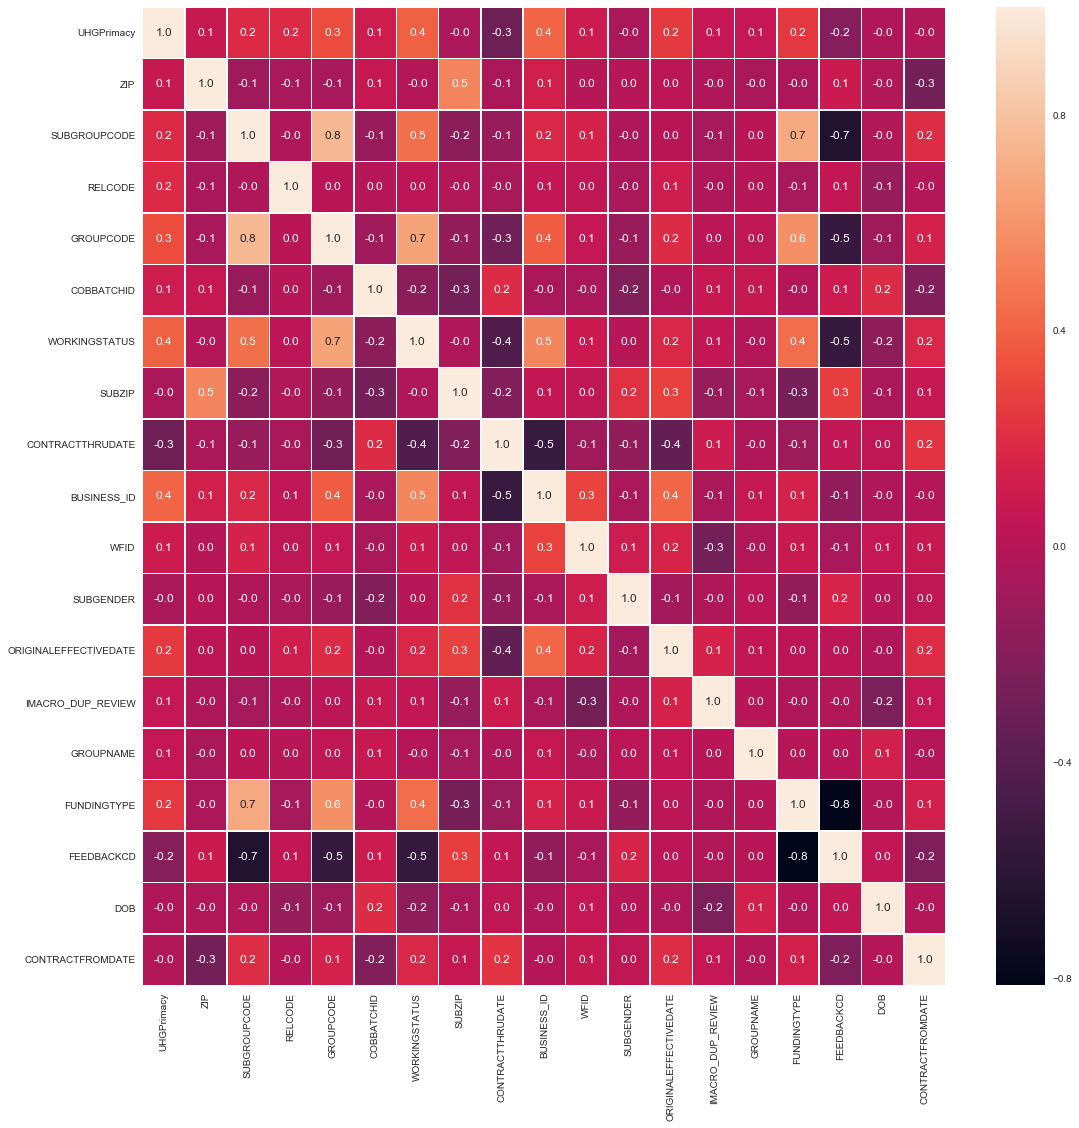

In [50]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df_processed.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

## Important Variables

In [51]:
# creating correlation dataframe
df_corr = df_processed.corr()

# setting threshold values for extracting important variables. You can set up your own threshold.
threshold = 0.3
important_var = [col for col in df_corr.index if df_corr.UHGPrimacy[col] > threshold]

# removing 'UHGPrimacy' from important_var list because the collinearity of 'UHGPrimacy' to 'UHGPrimacy' is 1, as shown
# in the above graph.
important_var.remove('UHGPrimacy')
important_var

['GROUPCODE', 'WORKINGSTATUS', 'BUSINESS_ID']

## Single feature column analysis with respect to Target Column
##### When you run the function - 'column_based_analysis' - you will see a dataframe similiar to the on shown below.

| GROUPCODE | UHGPRIMACY | record_count | primacy_percent | total_records | dataset_percent |
| ------ | ----- | ----- | ----- | ----- | ----- | ----- |
| 69003 | 2.0 | 6293 | 92.9 | 6771 | 1.648 |
| 63441 | 2.0 | 6075 | 94.98 | 6396 | 1.55 |
| 73408 | 2.0 | 5934 | 87.70 | 6766 | 1.64 |

##### Lets break down what you are seeing in the data frame.
- `GROUP CODE` - This is the column that is being analysed. Each row in this column contains a groupcode eg. 69003, 63441 etc.<br/>
- `record_count` - Example - If groupcode is 69003 then UHGPrimacy is 2.0 for 6293 records.<br/>
- `primacy_percent` - Its value is calculated as `(record_count/total_records)*100`.<br/>
- `total_records` - How many records are there for a specific groupcode. Example - there are 6771 records that have groupcode = 69003.<br/>
- `dataset_percent` - Its value is calculated as `(total_records/total records in the dataset)*100`.

In [52]:
# set the value of the column to be analysed.
column_to_be_analysed = 'GROUPCODE'

In [53]:
df_analysed = column_based_analysis(df, col_analysed=column_to_be_analysed, target_col=target_col)
df_analysed

record_count  primacy_percent  total_records  \
GROUPCODE UHGPrimacy                                                 
IAQHP     2                   1108        93.187553           1189   
AZHCCCS   2                   1095        93.910806           1166   
NYCDFHP   2                   1067        88.400994           1207   
WAHLOP    2                    920        93.117409            988   
WIFHMD    2                    867        97.525309            889   
NJFAMCAR  2                    793        90.421893            877   
TXSTAR    2                    793        73.836127           1074   
OHPHCP    2                    709        92.558747            766   
000701648 1                    661        76.327945            866   
TXSTPL    2                    551        86.771654            635   
LABYHP    2                    529        86.296900            613   
PAPHCP    2                    495        85.051546            582   
FLMMA     2                    381        86.004515            443   
TNTNCARE  2                    357        84.798100            421   
KSKCMD    2                    341        87.435897            390   
MIPHCP    2                    293        95.129870            308   
HCFAU5    2                    284        58.677686            484   
TXSTAR    1                    281        26.163873           1074   
NESHAD    2                    275        94.827586            290   
MDCAID    2                    257        93.454545            275   
000701648 2                    205        23.672055            866   
HCFAU5    1                    198        40.909091            484   
AT2285    1                    191        82.683983            231   
MSCAN     2                    186        89.423077            208   
OEB012405 1                    185        94.387755            196   
HCFAU4    2                    176        82.629108            213   
NMCC      2                    164        88.648649            185   
HCFAV1    2                    157        81.347150            193   
SC4848    1                    139        62.331839            223   
NYCDFHP   1                    135        11.184756           1207   
HCFAZ9    2                    133        72.282609            184   
000902866 1                    133        81.595092            163   
HCFAD7    2                    127        73.410405            173   
MOHNET    2                    126        76.363636            165   
TXSTK     2                    125        81.699346            153   
000184514 1                    121        76.100629            159   
RAM082075 1                    115        64.606742            178   
NYCHP     2                    113        98.260870            115   
VRG099953 1                    107        62.209302            172   
TXCHIP    2                    105        90.517241            116   
000712403 2                    104        69.798658            149   
000226310 1                    102        71.328671            143   
246335    1                    101        73.722628            137   
401056    1                     99        83.898305            118   
NYEPP     2                     98        91.588785            107   
HCFAJ6    2                     97        52.150538            186   
HCFAH4    2                     97        69.285714            140   
NY20392   1                     97        68.794326            141   
OEB012309 1                     92        73.600000            125   
HCFAJ6    1                     89        47.849462            186   
000717191 1                     87        76.315789            114   
000199409 1                     85        74.561404            114   
PAPHCP    1                     84        14.432990            582   
NJFAMCAR  1                     83         9.464082            877   
SC4848    2                     83        37.219731            223   
VACCCP    2                     

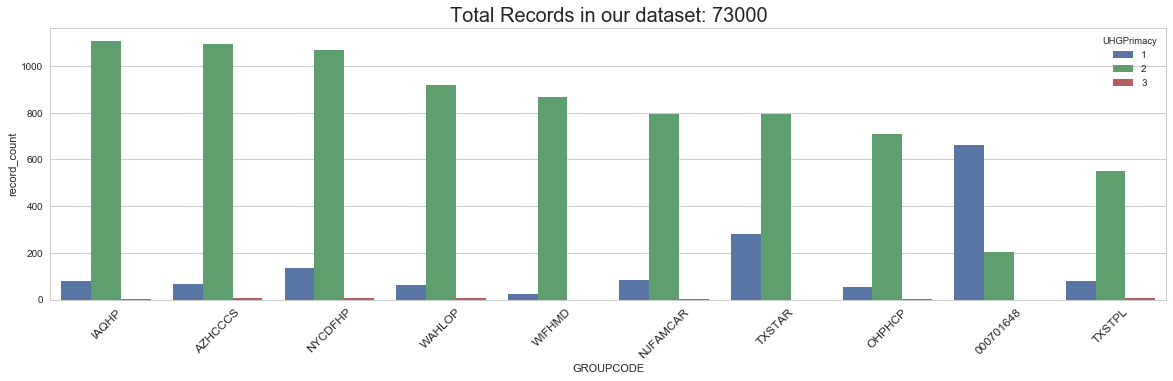

In [54]:
df_analysed_copy = df_analysed.copy()
graph_for_column_analysis(df_graph = df_analysed_copy, n = 10, col_analysed = column_to_be_analysed)

In [55]:
# set the value of the column to be analysed.
column_to_be_analysed = 'BUSINESS_ID'

In [56]:
df_analysed = column_based_analysis(df, col_analysed=column_to_be_analysed, target_col=target_col)
df_analysed

record_count  primacy_percent  total_records  \
BUSINESS_ID UHGPrimacy                                                 
6.0         1                  26281        81.254638          32344   
36.0        2                  12236        89.379109          13690   
6.0         2                   6047        18.695894          32344   
37.0        1                   5328        67.769016           7862   
1.0         1                   3978        74.943482           5308   
30.0        1                   3888        68.741160           5656   
37.0        2                   2521        32.065632           7862   
24.0        2                   2457        64.285714           3822   
30.0        2                   1755        31.028996           5656   
36.0        1                   1409        10.292184          13690   
24.0        1                   1354        35.426478           3822   
1.0         2                   1323        24.924642           5308   
9.0         1                   1187        69.415205           1710   
            2                    521        30.467836           1710   
53.0        1                    490        64.558630            759   
21.0        1                    441        79.746835            553   
38.0        2                    392        80.492813            487   
53.0        2                    269        35.441370            759   
52.0        2                    212        76.811594            276   
21.0        2                    112        20.253165            553   
38.0        1                     92        18.891170            487   
29.0        1                     75        83.333333             90   
39.0        1                     66        84.615385             78   
52.0        1                     64        23.188406            276   
36.0        3                     45         0.328707          13690   
6.0         3                     16         0.049468          32344   
29.0        2                     14        15.555556             90   
37.0        3                     13         0.165352           7862   
30.0        3                     13         0.229844           5656   
39.0        2                     12        15.384615             78   
24.0        3                     11         0.287807           3822   
1.0         3                      7         0.131876           5308   
41.0        2                      6       100.000000              6   
3.0         2                      3        75.000000              4   
38.0        3                      3         0.616016            487   
2.0         1                      2       100.000000              2   
9.0         3                      2         0.116959           1710   
3.0         1                      1        25.000000              4   
29.0        3                      1         1.111111             90   

                        dataset_percent  
BUSINESS_ID UHGPrimacy                   
6.0         1                 44.306849  
36.0        2                 18.753425  
6.0         2                 44.306849  
37.0        1                 10.769863  
1.0         1                  7.271233  
30.0        1                  7.747945  
37.0        2                 10.769863  
24.0        2                  5.235616  
30.0        2                  7.747945  
36.0        1                 18.753425  
24.0        1                  5.235616  
1.0         2                  7.271233  
9.0         1                  2.342466  
            2                  2.342466  
53.0        1                  1.039726  
21.0        1                  0.757534  
38.0        2                  0.667123  
53.0        2                  1.039726  
52.0        2                  0.378082  
21.0        2                  0.757534  
38.0        1                  0.667123  
29.0        1                  0.123288  
39.0        1                  0.106849  
52.0        1        

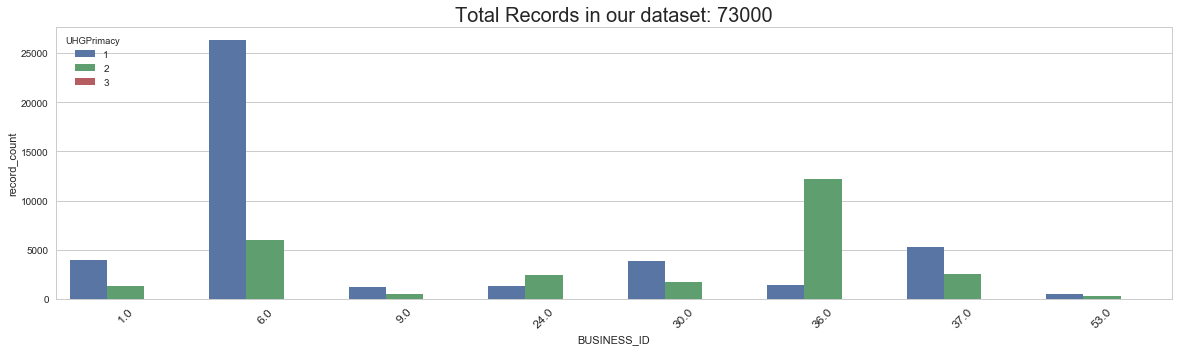

In [57]:
df_analysed1 = df_analysed.copy()
graph_for_column_analysis(df_graph = df_analysed1, n = 15, col_analysed = column_to_be_analysed)

In [58]:
# set the value of the column to be analysed.
column_to_be_analysed = 'WORKINGSTATUS'

In [59]:
df_analysed = column_based_analysis(df, col_analysed=column_to_be_analysed, target_col=target_col)
df_analysed

record_count  primacy_percent  total_records  \
WORKINGSTATUS UHGPrimacy                                                 
A             1                  30506        80.367775          37958   
              2                   7438        19.595342          37958   
R             2                    482        60.024907            803   
              1                    309        38.480697            803   
U             1                    299        89.789790            333   
              2                     34        10.210210            333   
Active        2                     16        69.565217             23   
A             3                     14         0.036883          37958   
R             3                     12         1.494396            803   
N             1                      9        56.250000             16   
              2                      7        43.750000             16   
Active        1                      7        30.434783             23   
S             2                      6        60.000000             10   
              1                      4        40.000000             10   
DECEASED      1                      2       100.000000              2   
Not Active    1                      2       100.000000              2   
COBRA         2                      2       100.000000              2   
Z             1                      1        50.000000              2   
ACTIVE        1                      1        50.000000              2   
              2                      1        50.000000              2   
Terminated    3                      1       100.000000              1   
M             1                      1        50.000000              2   
Retired       2                      1       100.000000              1   
M             2                      1        50.000000              2   
Cobra         2                      1       100.000000              1   
Not active    2                      1       100.000000              1   
Not Employ    2                      1       100.000000              1   
F             1                      1       100.000000              1   
Z             2                      1        50.000000              2   

                          dataset_percent  
WORKINGSTATUS UHGPrimacy                   
A             1                 51.997260  
              2                 51.997260  
R             2                  1.100000  
              1                  1.100000  
U             1                  0.456164  
              2                  0.456164  
Active        2                  0.031507  
A             3                 51.997260  
R             3                  1.100000  
N             1                  0.021918  
              2                  0.021918  
Active        1                  0.031507  
S             2                  0.013699  
              1                  0.013699  
DECEASED      1                  0.002740  
Not Active    1                  0.002740  
COBRA         2                  0.002740  
Z             1                  0.002740  
ACTIVE        1                  0.002740  
              2                  0.002740  
Terminated    3                  0.001370  
M             1                  0.002740  
Retired       2                  0.001370  
M             2                  0.002740  
Cobra         2                  0.001370  
Not active    2                  0.001370  
Not Employ    2                  0.001370  
F             1                  0.001370  
Z             2                  0.002740

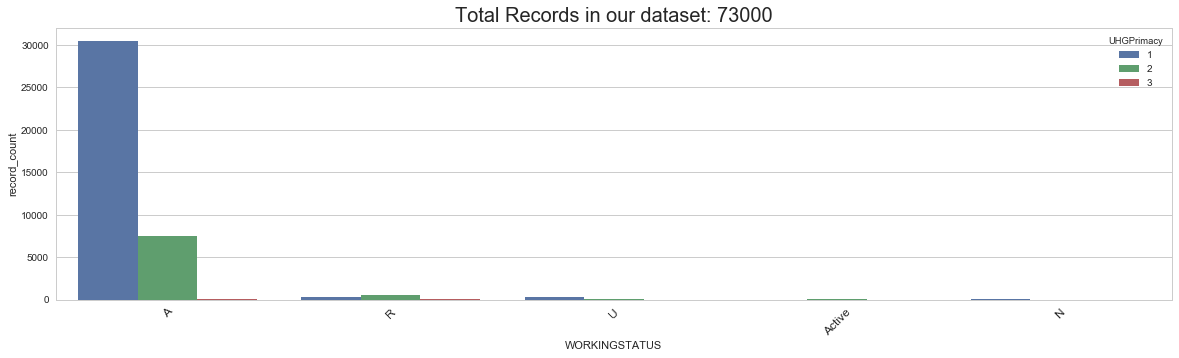

In [60]:
df_analysed1 = df_analysed.copy()
graph_for_column_analysis(df_graph = df_analysed1, n = 10, col_analysed = column_to_be_analysed)